<a href="https://colab.research.google.com/github/HarshilGem/pro_t3/blob/main/twitter_analysis_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset


# Sample Dataset :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [2]:
import pandas as pd

data  = pd.read_csv("/content/twitter_training.csv")

df = pd.DataFrame(data)

# Dropping duplicates
df.drop_duplicates(inplace=True)

# Display the cleaned dataset
df


,tweet_id,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
# Overall positive, negative, irrevant, neutral

<Figure size 800x600 with 0 Axes>

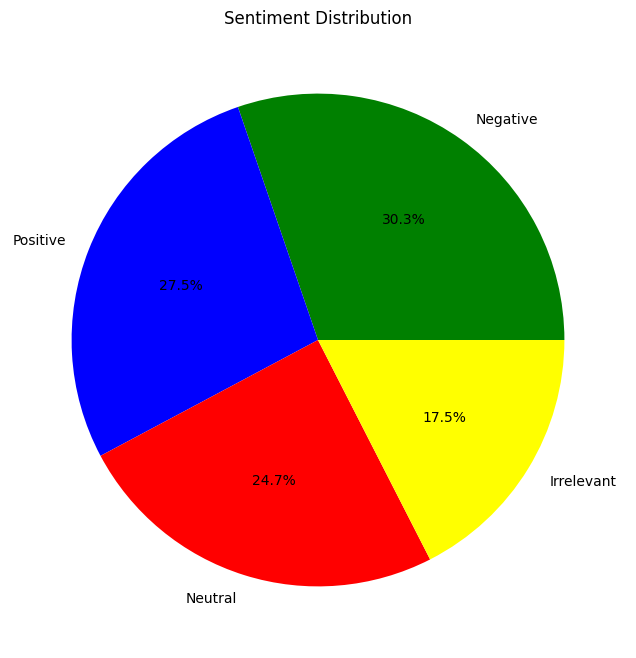

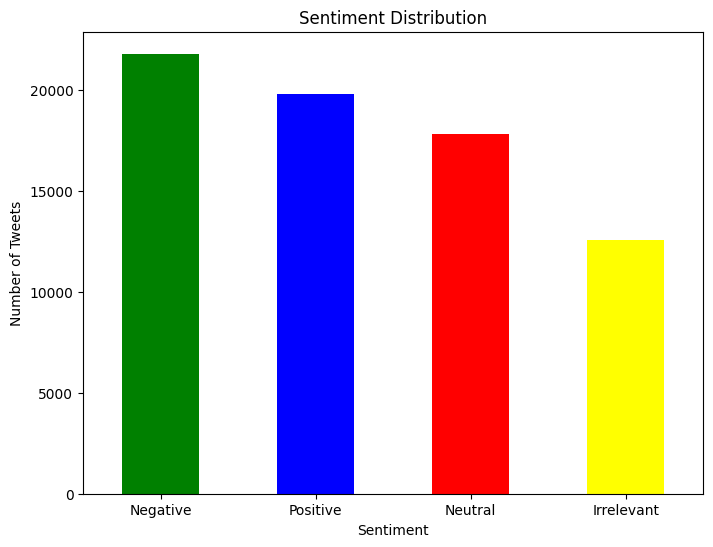

In [3]:
import matplotlib.pyplot as plt

# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.keys(), autopct='%1.1f%%', colors=['green', 'blue', 'red', 'yellow'])
plt.title('Sentiment Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red', 'yellow'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Entity wise analysis
# choose the entity from the drop down menu and it will display analysis


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets


# Step 1: Define a function to visualize sentiment distribution for a selected entity
def plot_sentiment_distribution(entity):
    entity_df = df[df['entity'] == entity]
    sentiment_counts = entity_df['sentiment'].value_counts()

    # Plotting the bar chart
    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
    plt.title(f'Sentiment Distribution for {entity}')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.show()

# Step 2: Create a dropdown widget with unique entities
entity_dropdown = widgets.Dropdown(
    options=df['entity'].unique(),
    description='Entity:',
    disabled=False,
)

# Step 3: Display the interactive widget and link it to the plotting function
interact(plot_sentiment_distribution, entity=entity_dropdown);


interactive(children=(Dropdown(description='Entity:', options=('Borderlands', 'CallOfDutyBlackopsColdWar', 'Am…

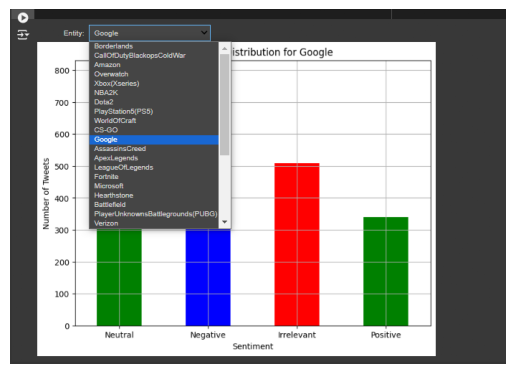

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/Screenshot 2024-06-14 163446.png') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
# Creating the word cloud for the positive and negative tweet words

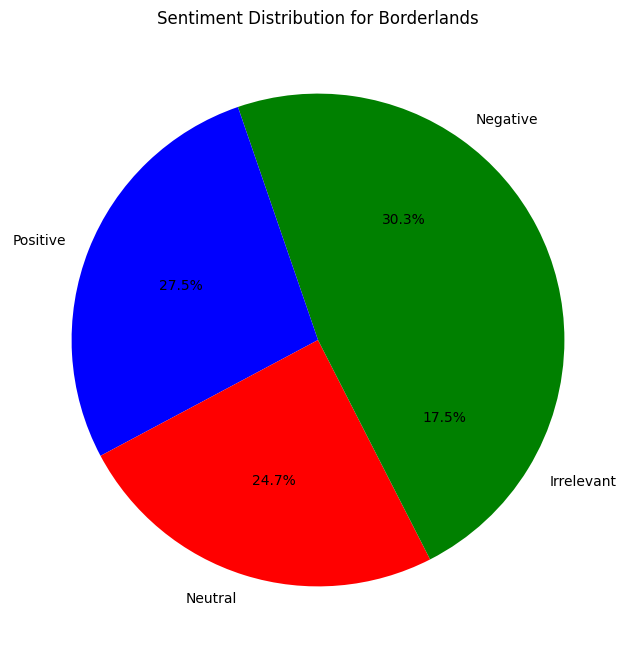

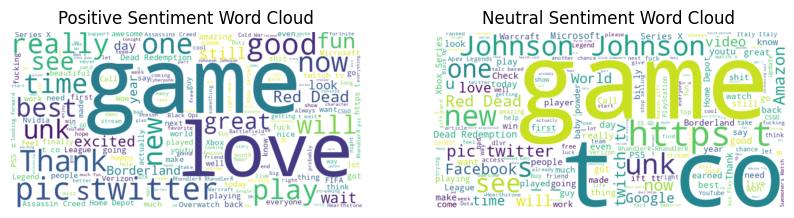

In [5]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

# Pie chart for sentiment distribution
plt.figure(figsize=(8, 8))
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title('Sentiment Distribution for Borderlands')
plt.ylabel('')
plt.show()

# Handle NaN values and generate word clouds for positive and neutral sentiments
positive_tweets = ' '.join(df[df['sentiment'] == 'Positive']['content'].dropna())
neutral_tweets = ' '.join(df[df['sentiment'] == 'Neutral']['content'].dropna())

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_tweets)

# Displaying the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

plt.show()

In [ ]:
# creating a bar graph for words with its frequencies

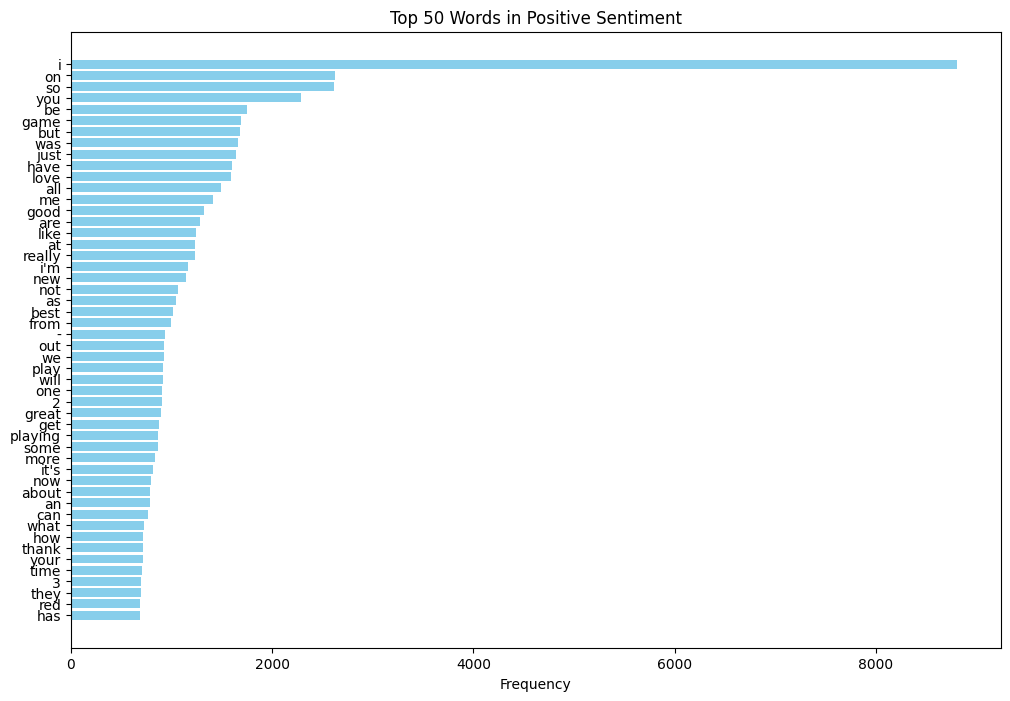

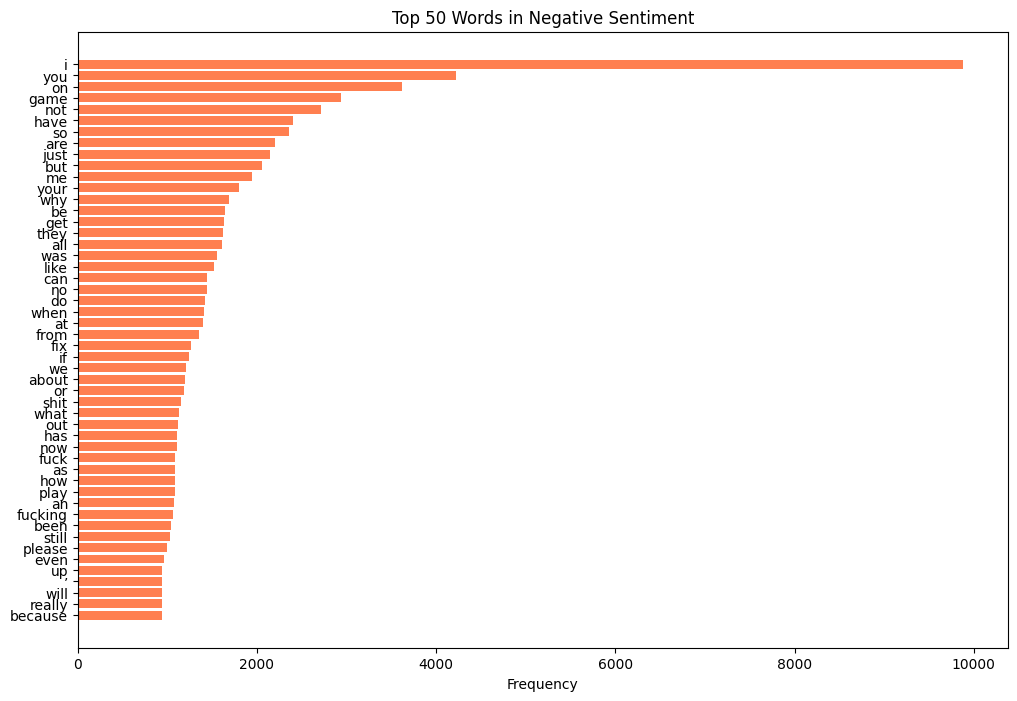

In [6]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords



# Define common words to exclude
common_words =  ['the', 'I', 'to', 'and', 'a', 'of', 'for', 'is', 'in', 'this', 'that', 'with', 'my', 'it', 'own', '@', '.', '/']

# Function to generate word frequencies for sentiment
def generate_word_frequencies(sentiment, top_n=50):
    # Filter tweets by sentiment
    tweets = ' '.join(df[df['sentiment'] == sentiment]['content'].dropna())

    # Calculate word frequencies excluding common words
    word_freq = Counter([word.lower() for word in tweets.split() if word.lower() not in common_words])

    # Select top N words
    top_words = word_freq.most_common(top_n)

    # Return as dictionary for easier plotting
    return dict(top_words)

# Generate word frequencies for positive and negative sentiments
positive_word_freq = generate_word_frequencies('Positive', top_n=50)
negative_word_freq = generate_word_frequencies('Negative', top_n=50)

# Plotting bar chart for positive words
plt.figure(figsize=(12, 8))
plt.barh(list(positive_word_freq.keys()), list(positive_word_freq.values()), color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 50 Words in Positive Sentiment')
plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
plt.show()

# Plotting bar chart for negative words
plt.figure(figsize=(12, 8))
plt.barh(list(negative_word_freq.keys()), list(negative_word_freq.values()), color='coral')
plt.xlabel('Frequency')
plt.title('Top 50 Words in Negative Sentiment')
plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
plt.show()
